In [92]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# Define constants for the game
SIZE = 4
PROBABILITY_4 = 0.1


In [36]:
# S-shaped weight matrix using powers of 2
SNAKE_WEIGHT_MATRIX = np.array([
    [2**15, 2**14, 2**13, 2**12],
    [2**8, 2**9, 2**10, 2**11],
    [2**7, 2**6, 2**5, 2**4],
    [2**0, 2**1, 2**2, 2**3]
])


In [37]:
# Function to initialize the game board
def init_board():
    board = np.zeros((SIZE, SIZE), dtype=int)
    add_random_tile(board)
    add_random_tile(board)
    return board

In [38]:
# Function to add a random tile to the board
def add_random_tile(board):
    empty_cells = [(i, j) for i in range(SIZE) for j in range(SIZE) if board[i, j] == 0]
    if not empty_cells:
        return
    i, j = random.choice(empty_cells)
    board[i, j] = 4 if random.random() < PROBABILITY_4 else 2

In [39]:
# Function to check if any moves are possible
def is_moves_possible(board):
    for i in range(SIZE):
        for j in range(SIZE):
            if board[i, j] == 0:
                return True
            if i > 0 and board[i, j] == board[i-1, j]:
                return True
            if i < SIZE - 1 and board[i, j] == board[i+1, j]:
                return True
            if j > 0 and board[i, j] == board[i, j-1]:
                return True
            if j < SIZE - 1 and board[i, j] == board[i, j+1]:
                return True
    return False

In [46]:
# S-shaped heuristic evaluation function
def evaluate_board(board):
    return np.sum(board * SNAKE_WEIGHT_MATRIX)

In [48]:
# Function to move the tiles on the board
def move(board, direction):
    def merge(row):
        non_zero = row[row != 0]
        merged = []
        skip = False
        for i in range(len(non_zero)):
            if skip:
                skip = False
                continue
            if i + 1 < len(non_zero) and non_zero[i] == non_zero[i + 1]:
                merged.append(non_zero[i] * 2)
                skip = True
            else:
                merged.append(non_zero[i])
        return np.array(merged + [0] * (SIZE - len(merged)))

    if direction == 'up':
        board = np.array([merge(board[:, i]) for i in range(SIZE)]).T
    elif direction == 'down':
        board = np.array([merge(board[:, i][::-1])[::-1] for i in range(SIZE)]).T
    elif direction == 'left':
        board = np.array([merge(board[i]) for i in range(SIZE)])
    elif direction == 'right':
        board = np.array([merge(board[i][::-1])[::-1] for i in range(SIZE)])
    return board

In [50]:
# Expectimax function
def expectimax(board, depth, turn):
    if depth == 0 or not is_moves_possible(board):
        return evaluate_board(board)
    
    if turn == 'player1':  # Maximizing player
        best_value = -float('inf')
        for direction in ['up', 'down', 'left', 'right']:
            new_board = move(board.copy(), direction)
            if not np.array_equal(new_board, board):
                val = expectimax(new_board, depth - 1, 'player2')
                best_value = max(best_value, val)
        return best_value
    else:  # Expectation (random tile spawn)
        expected_value = 0
        empty_cells = [(i, j) for i in range(SIZE) for j in range(SIZE) if board[i, j] == 0]
        num_empty_cells = len(empty_cells)
        for (i, j) in empty_cells:
            for tile, prob in [(2, 1 - PROBABILITY_4), (4, PROBABILITY_4)]:
                new_board = board.copy()
                new_board[i, j] = tile
                val = expectimax(new_board, depth - 1, 'player1')
                expected_value += prob * val / num_empty_cells
        return expected_value

In [52]:
# Function to find the best move
def find_best_move(board, depth=3):
    best_move = None
    best_value = -float('inf')
    for direction in ['up', 'down', 'left', 'right']:
        new_board = move(board.copy(), direction)
        if not np.array_equal(new_board, board):
            move_value = expectimax(new_board, depth, 'player2')
            if move_value > best_value:
                best_value = move_value
                best_move = direction
    return best_move

In [54]:
# Function to play the game until it's over
def play_game(depth=3):
    board = init_board()
    print("Initial Board:")
    print(board)
    
    while is_moves_possible(board):
        best_move = find_best_move(board, depth)
        if best_move is None:
            break
        board = move(board, best_move)
        add_random_tile(board)
        print(f"Board after move {best_move}:")
        print(board)
    
    print("Game Over!")
    print("Final Board:")
    print(board)
    print("Max Tile:", np.max(board))

In [56]:
# Example of running the game
play_game(depth=3)

Initial Board:
[[0 0 0 0]
 [0 0 0 2]
 [0 0 2 0]
 [0 0 0 0]]
Board after move left:
[[2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 0 0]]
Board after move up:
[[4 0 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 2 0]]
Board after move up:
[[4 0 2 2]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Board after move left:
[[4 4 0 0]
 [2 0 0 0]
 [0 2 0 0]
 [0 0 0 0]]
Board after move left:
[[8 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 2 0]]
Board after move up:
[[8 0 2 0]
 [4 0 0 0]
 [0 2 0 0]
 [0 0 0 0]]
Board after move up:
[[8 2 2 0]
 [4 0 0 0]
 [0 0 2 0]
 [0 0 0 0]]
Board after move up:
[[8 2 4 0]
 [4 0 0 0]
 [0 0 0 2]
 [0 0 0 0]]
Board after move up:
[[8 2 4 2]
 [4 0 0 0]
 [2 0 0 0]
 [0 0 0 0]]
Board after move right:
[[8 2 4 2]
 [0 0 0 4]
 [0 0 2 2]
 [0 0 0 0]]
Board after move right:
[[8 2 4 2]
 [0 0 0 4]
 [0 0 0 4]
 [2 0 0 0]]
Board after move right:
[[8 2 4 2]
 [0 0 0 4]
 [2 0 0 4]
 [0 0 0 2]]
Board after move right:
[[8 2 4 2]
 [0 0 2 4]
 [0 0 2 4]
 [0 0 0 2]]
Board after move up:
[[8 2 4 2]
 [0 0 4 8]
 [0 0 0 2]
 [0 2 0 0]

In [68]:
# Function to play the game until it's over
def play_game(depth=3):
    board = init_board()
    while is_moves_possible(board):
        best_move = find_best_move(board, depth)
        if best_move is None:
            break
        board = move(board, best_move)
        add_random_tile(board)
    return np.max(board)

# Function to play multiple games and collect the results
def play_multiple_games(num_games=100, depth=3):
    max_tiles = []
    for _ in range(num_games):
        max_tile = play_game(depth)
        max_tiles.append(max_tile)
    return max_tiles


In [116]:
# Function to plot the results
def plot_results(max_tiles):
    max_tiles = [tile for tile in max_tiles if tile is not None]  # Filter out None values
    frequencies = list(range(1, len(max_tiles) + 1))
    plt.plot(frequencies, max_tiles, marker='o')
    plt.xlabel('Frequency (Game Number)')
    plt.ylabel('Max Tile Achieved')
    plt.title('Max Tile Achieved in 100 Games For Expectimax')
    plt.yticks([2**i for i in range(8, int(np.log2(max(max_tiles))) + 2)])
    plt.grid(True)
    plt.show()

In [108]:
def display_highest_tile_percentages(max_tiles):
    unique, counts = np.unique(max_tiles, return_counts=True)
    percentages = counts / len(max_tiles) * 100
    data = {'Highest Tile': unique, 'Percentage': percentages}
    df = pd.DataFrame(data)
    print(df)

In [110]:
max_tiles2 = play_multiple_games(num_games=100, depth=2)

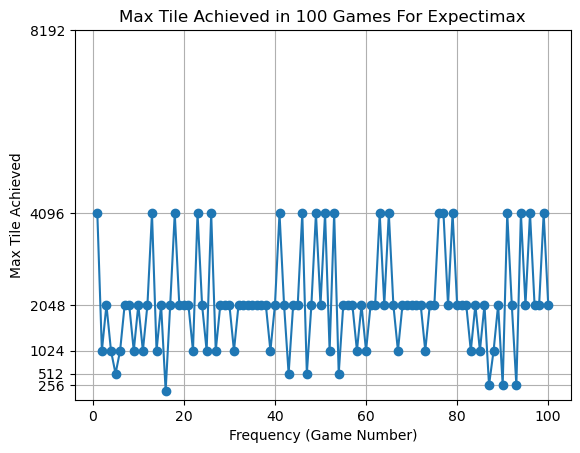

In [118]:
plot_results(max_tiles2)

In [112]:
display_highest_tile_percentages(max_tiles2)

   Highest Tile  Percentage
0           128         1.0
1           256         3.0
2           512         4.0
3          1024        19.0
4          2048        54.0
5          4096        19.0


In [76]:
max_tiles = play_multiple_games(num_games=100, depth=3)

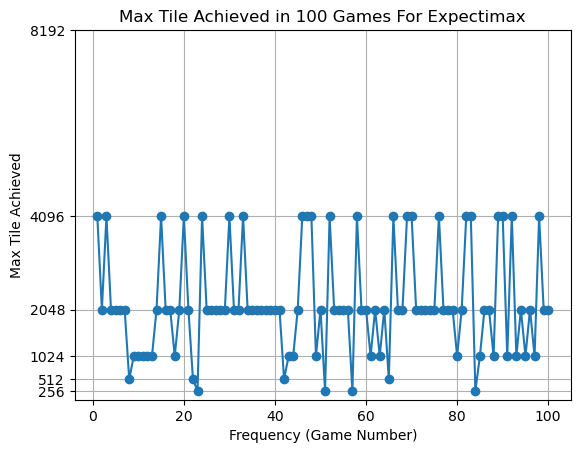

In [120]:
plot_results(max_tiles)

In [96]:
display_highest_tile_percentages(max_tiles)

   Highest Tile  Percentage
0           256         4.0
1           512         4.0
2          1024        18.0
3          2048        52.0
4          4096        22.0
